1. collect data from repositories
2. pre-process data
3. sentiment analysis from both repositories
4. compare compound comments 

In [6]:
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os
from textblob import TextBlob

from pattern.en import sentiment



load_dotenv()

True

In [7]:
token = os.getenv('github_token')

owner_nextauth = 'nextauthjs'
repo_nextauth = 'next-auth'

owner_liferay = 'liferay'
repo_liferay = 'liferay-portal'

owner_tensorflow = 'tensorflow'
repo_tensorflow = 'tensorflow'

owner_python = 'TheAlgorithms'
repo_python = 'Python'

owner_free_code_camp = 'freeCodeCamp'
repo_free_code_camp = 'freeCodeCamp'



GET PR WITH COMMENTS - NEXTAUTH

In [8]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner_nextauth}/{repo_nextauth}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments_nextauth = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner_nextauth}/{repo_nextauth}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments_nextauth.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments_nextauth):
    print(index, pr_number)

0 8364
1 8354
2 8189
3 8114


GET PR WITH COMMENTS - PYTHON

In [9]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner_python}/{repo_python}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments_python = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner_python}/{repo_python}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments_python.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments_python):
    print(index, pr_number)

0 9001
1 8996
2 8977
3 8956
4 8938
5 8933
6 8920
7 8915
8 8886
9 8869
10 8868
11 8858
12 8834
13 8783
14 8778
15 8758
16 8753
17 8720


GET PR WITH COMMENTS - FREE CODE CAMP

In [34]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner_free_code_camp}/{repo_free_code_camp}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments_free_code_camp = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner_free_code_camp}/{repo_free_code_camp}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments_free_code_camp.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments_free_code_camp):
    print(index, pr_number)


0 51370
1 51348
2 51347
3 51345
4 51255
5 51250
6 51246
7 51215


GET PR WITH COMMENTS - LIFERAY-PORTAL

In [11]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner_liferay}/{repo_liferay}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments_liferay = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner_liferay}/{repo_liferay}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments_liferay.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments_liferay):
    print(index, pr_number)

0 5469


GET PR WITH COMMENTS - TENSORFLOW

In [12]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner_tensorflow}/{repo_tensorflow}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments_tensorflow = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner_tensorflow}/{repo_tensorflow}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments_tensorflow.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments_tensorflow):
    print(index, pr_number)

0 61706
1 61682
2 61660
3 61640
4 61632
5 61597
6 61591
7 61583
8 61497
9 61491


GET COMMENTS - NEXTAUTH

In [13]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner_nextauth}/{repo_nextauth}/pulls/{pr_with_comments_nextauth[1]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies_nextauth = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies_nextauth.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies_nextauth)

['# # Missing rate limiting route handler performs [ authorization ] ( 1 ) , rate-limited . [ Show details ] ( https : //github.com/nextauthjs/next-auth/security/code-scanning/116 )', '# # Missing rate limiting route handler performs [ authorization ] ( 1 ) , rate-limited . [ Show details ] ( https : //github.com/nextauthjs/next-auth/security/code-scanning/117 )', "file gitignored , 's autogenerated file . See https : //github.com/nextauthjs/next-auth/blob/b20182c5fecf6997ad544a8069d2383bddfdcd2b/docs/docusaurus.config.js # L249-L263 example", "`` ` suggestion `` files '' : [ `` * .js '' , `` * .d.ts * '' , `` lib '' , `` src '' ] , `` `", "`` ` suggestion `` dependencies '' : { `` @ auth/core '' : `` workspace : experimental '' } , `` `", "`` ` suggestion `` Auth.js '' `` `", "`` ` suggestion `` ` Let 's support Node.js versions ` node-fetch ` necessary , environments ` fetch ` already polyfilled . : tada : : relieved : TLDR ; n't want ` @ auth/ * ` polyfilling . need tests , ` undici

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GET COMMENTS - LIFERAY-PORTAL

In [14]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner_liferay}/{repo_liferay}/pulls/{pr_with_comments_liferay[0]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies_liferay = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies_liferay.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies_liferay)

['get lazy initialization instead creating ` useEffect ` . `` ` jsx const [ value , setValue ] = useState ( ( ) = > getSettingValue ( defaultValue , sessionClicksValue , key ) ) ; `` `', 'Maybe add directly Clay , pressing ` Enter ` call ` onToggle ` callback .', "could wrong think ` Liferay.detach ` remove listener based function reference , create anonymous function 's different reference ` onOpenChange ` security think best would create named function inside ` useEffect ` pass ` Liferay.on ` ` Liferay.detach ` method .", "Would n't better check ` sessionClicksValue === undefined ` ` typeof sessionClicksValue === 'undefined ' ` ? would purpose ` SETTINGS_STRING_VALUES_MAP ` ?", 'think checking ` localStorageValue ! == null ` would enough need ` SETTINGS_STRING_VALUES_MAP ` . could return value ` defaultValue ` ` localStorageValue ` instead using constant ` SETTINGS_STRING_VALUES_MAP ` .', "Well , since toggle form element , pressing enter focused inside form submit form . 's case 's 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GET COMMENTS - TENSORFLOW

In [15]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner_tensorflow}/{repo_tensorflow}/pulls/{pr_with_comments_tensorflow[1]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies_tensorflow = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies_tensorflow.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies_tensorflow)

['since 2018 . sure cause issue ?', "Ca n't 100 % sure able find code pywrap_tfe , find .so file . thing could affect apart context ( ` _ctx ` ) , reference , talking following code ` gen_array_ops.py ` : `` ` _result = pywrap_tfe.TFE_Py_FastPathExecute ( _ctx , `` Reshape '' , name , tensor , shape ) `` ` said , scenarios print context prints information : `` ` context : Eager TensorFlow Context 1 devices Device 0 : /job : localhost/replica:0/task:0/device : CPU:0 `` ` n't think fact code around since 2018 valid reason question .", "> n't think fact code around since 2018 valid reason question . Well , plus CI tests pass , several instances file ( throughout codebase ) use lists reshape . exactly triggering error first place ?", "> Well , plus CI tests pass , several instances file ( throughout codebase ) use lists reshape . CI tests never cover corner cases , , would never bugs . minimum reproducible code create produces error , took values printing values environment fails : `` ` im

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GET COMMENTS - PYTHON

In [16]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner_python}/{repo_python}/pulls/{pr_with_comments_python[3]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies_python = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies_python.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies_python)

['Please provide return type hint function : ` paulix_gate ` . * * function return value , please provide type hint : * * ` def function ( ) - > None : ` Please provide type hint parameter : ` input_realvalue ` Please provide type hint parameter : ` input_imaginaryvalue `', 'Please provide return type hint function : ` pauliy_gate ` . * * function return value , please provide type hint : * * ` def function ( ) - > None : ` Please provide type hint parameter : ` input_realvalue ` Please provide type hint parameter : ` input_imaginaryvalue `', 'Please provide return type hint function : ` pauliz_gate ` . * * function return value , please provide type hint : * * ` def function ( ) - > None : ` Please provide type hint parameter : ` input_realvalue ` Please provide type hint parameter : ` input_imaginaryvalue `', 'Please provide return type hint function : ` identity_gate ` . * * function return value , please provide type hint : * * ` def function ( ) - > None : ` Please provide type hi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GET COMMENTS - FREE CODE CAMP

In [37]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner_free_code_camp}/{repo_free_code_camp}/pulls/{pr_with_comments_free_code_camp[2]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies_free_code_camp = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies_free_code_camp.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies_free_code_camp)

["`` ` suggestion `` order '' : 2 , `` ` please tests .", '`` ` suggestion goal mathematical puzzle stack disks one peg another , following specific rules restrict placing larger disk top smaller one . `` `', '`` ` suggestion Start creating empty object named ` rods ` represent pegs . `` `', "`` ` suggestion use ` range ( ) ` function assign ` rods [ ' ' ] ` sequence numbers . syntax range function ` range ( start , stop , step ) ` . `` `", "`` ` suggestion print type ` rods [ ' ' ] ` using ` print ( ) ` function . `` `", 'initial project , teaching campers add comments would good . Otherwise maybe skip .', "Rephrased instruction . `` ` suggestion allowed disk movements rods exhibit repetitive pattern , every occurring three moves . example , movements rods C repeat first , fourth , seventh , etc. , moves , remainder division move number 3 equal 1 . Inside previously created ` ` loop , replace existing print statement ` ` statement triggers ( + 1 ) % 3 == 1 . Within statement , print `

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j-vit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


COMPARE COMPOUND SENTIMENT BETWEEN LIFERAY-PORTAL, NEXTAUTH, TENSORFLOW, PYTHON AND FREE CODE CAMP

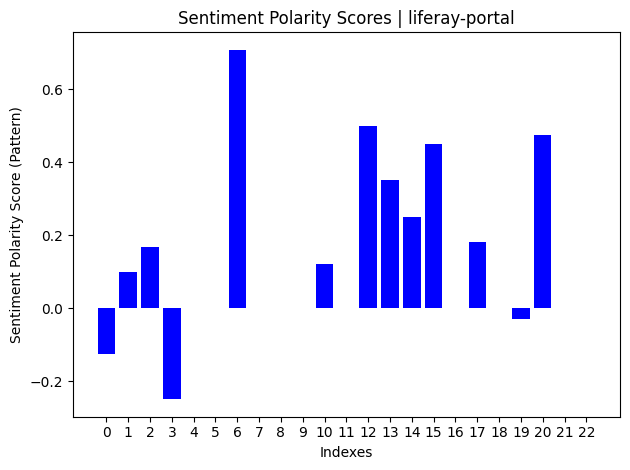

In [23]:
sentiment_scores_liferay = []

for pr_comment in cleaned_bodies_liferay:
    polarity, subjectivity = sentiment(pr_comment)
    sentiment_scores_liferay.append(polarity)

indices = range(len(cleaned_bodies_liferay))

plt.bar(indices, sentiment_scores_liferay, color='blue')

plt.xlabel('Indexes')
plt.ylabel('Sentiment Polarity Score (Pattern)')
plt.title('Sentiment Polarity Scores | liferay-portal')

plt.xticks(indices, [i for i in indices])

plt.tight_layout()
plt.show()

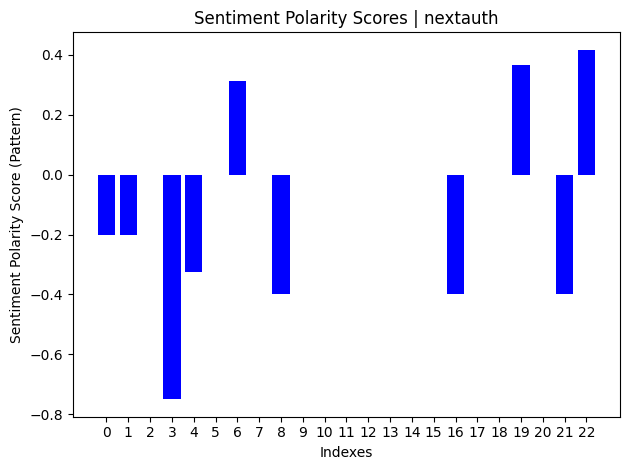

In [25]:

sentiment_scores_nextauth = []

for pr_comment in cleaned_bodies_nextauth:
    polarity, subjectivity = sentiment(pr_comment)
    sentiment_scores_nextauth.append(polarity)

indices = range(len(cleaned_bodies_nextauth))

plt.bar(indices, sentiment_scores_nextauth, color='blue')

plt.xlabel('Indexes')
plt.ylabel('Sentiment Polarity Score (Pattern)')
plt.title('Sentiment Polarity Scores | nextauth')

plt.xticks(indices, [i for i in indices])

plt.tight_layout()
plt.show()

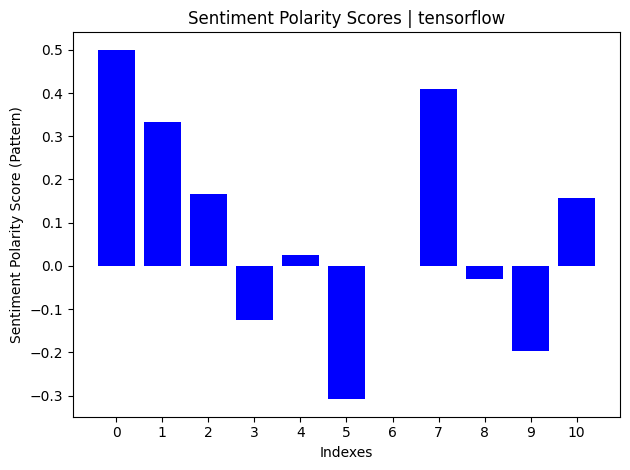

In [27]:
sentiment_scores_tensorflow = []

for pr_comment in cleaned_bodies_tensorflow:
    polarity, subjectivity = sentiment(pr_comment)
    sentiment_scores_tensorflow.append(polarity)

indices = range(len(cleaned_bodies_tensorflow))

plt.bar(indices, sentiment_scores_tensorflow, color='blue')

plt.xlabel('Indexes')
plt.ylabel('Sentiment Polarity Score (Pattern)')
plt.title('Sentiment Polarity Scores | tensorflow')

plt.xticks(indices, [i for i in indices])

plt.tight_layout()
plt.show()

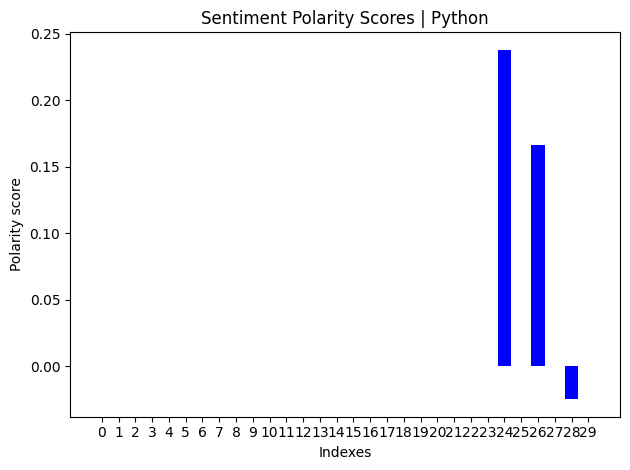

In [29]:

sentiment_scores_python = []

for pr_comment in cleaned_bodies_python:
    blob = TextBlob(pr_comment)
    sentiment_polarity = blob.sentiment.polarity  
    sentiment_scores_python.append(sentiment_polarity)

indices = range(len(cleaned_bodies_python))


plt.bar(indices, sentiment_scores_python, color='blue')

plt.xlabel('Indexes')
plt.ylabel('Polarity score')
plt.title('Sentiment Polarity Scores | Python')

plt.xticks(indices, [i for i in indices])

plt.tight_layout()
plt.show()

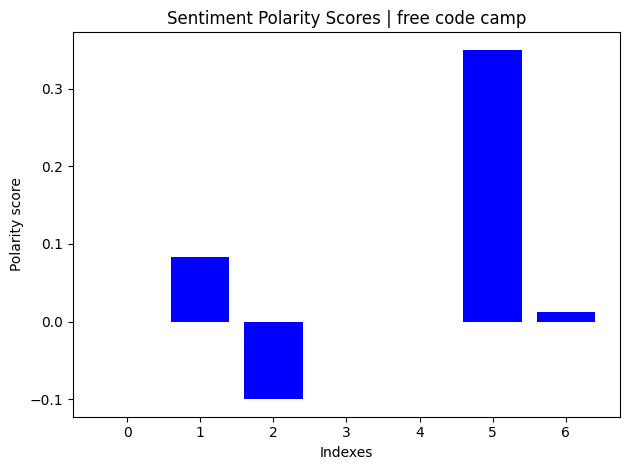

In [38]:

sentiment_scores_free_code_camp = []

for pr_comment in cleaned_bodies_free_code_camp:
    blob = TextBlob(pr_comment)
    sentiment_polarity = blob.sentiment.polarity  
    sentiment_scores_free_code_camp.append(sentiment_polarity)

indices = range(len(cleaned_bodies_free_code_camp))


plt.bar(indices, sentiment_scores_free_code_camp, color='blue')

plt.xlabel('Indexes')
plt.ylabel('Polarity score')
plt.title('Sentiment Polarity Scores | free code camp')

plt.xticks(indices, [i for i in indices])

plt.tight_layout()
plt.show()